In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import randint

# Load the Training Dataset
url = 'https://drive.google.com/file/d/1WdGxw3Oqm-pycQWpr1BjHN6oJ6pwd2Rb/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
train_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Load the Evaluation Dataset
url = 'https://drive.google.com/file/d/1BazG82OTa8wd10bIqVbduzaIf_FiOO0q/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
eval_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Feature Selection
X = train_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
y = train_data_set['throughput']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Evaluation - Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Linear Regression - Mean Squared Error (MSE): {mse_lr}')
print(f'Linear Regression - R^2 Score: {r2_lr}')
print(f'Linear Regression - Mean Absolute Error (MAE): {mae_lr}')

# Model Training - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation - Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')

# Model Training - Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Model Evaluation - Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f'Gradient Boosting - Mean Squared Error (MSE): {mse_gb}')
print(f'Gradient Boosting - R^2 Score: {r2_gb}')
print(f'Gradient Boosting - Mean Absolute Error (MAE): {mae_gb}')

# Model Training - Neural Network
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

# Model Evaluation - Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f'Neural Network - Mean Squared Error (MSE): {mse_nn}')
print(f'Neural Network - R^2 Score: {r2_nn}')
print(f'Neural Network - Mean Absolute Error (MAE): {mae_nn}')

# Hyperparameter Tuning - Random Forest
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 50)
}
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

# Model Evaluation - Best Random Forest
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f'Best Random Forest - Mean Squared Error (MSE): {mse_best_rf}')
print(f'Best Random Forest - R^2 Score: {r2_best_rf}')
print(f'Best Random Forest - Mean Absolute Error (MAE): {mae_best_rf}')

# Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-cv_scores.mean()}')

# Calculate Accuracy Percentage
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

# Linear Regression Accuracy
accuracy_lr = calculate_accuracy_percentage(mae_lr, mean_throughput)
print(f'Linear Regression Model Accuracy: {accuracy_lr:.2f}%')

# Random Forest Accuracy
accuracy_rf = calculate_accuracy_percentage(mae_rf, mean_throughput)
print(f'Random Forest Model Accuracy: {accuracy_rf:.2f}%')

# Gradient Boosting Accuracy
accuracy_gb = calculate_accuracy_percentage(mae_gb, mean_throughput)
print(f'Gradient Boosting Model Accuracy: {accuracy_gb:.2f}%')

# Neural Network Accuracy
accuracy_nn = calculate_accuracy_percentage(mae_nn, mean_throughput)
print(f'Neural Network Model Accuracy: {accuracy_nn:.2f}%')

# Predicting Throughput on Evaluation Dataset
X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)

eval_predictions = rf_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset: {eval_predictions}')


Linear Regression - Mean Squared Error (MSE): 76.7272032654898
Linear Regression - R^2 Score: 0.38343819796405965
Linear Regression - Mean Absolute Error (MAE): 6.73831925218616
Random Forest - Mean Squared Error (MSE): 5.69612367887548
Random Forest - R^2 Score: 0.9542272866650063
Random Forest - Mean Absolute Error (MAE): 1.031490164682546
Gradient Boosting - Mean Squared Error (MSE): 50.45005719766834
Gradient Boosting - R^2 Score: 0.5945951780494356
Gradient Boosting - Mean Absolute Error (MAE): 5.471455540661748


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Neural Network - Mean Squared Error (MSE): 58.93917248955987
Neural Network - R^2 Score: 0.5263786394646952
Neural Network - Mean Absolute Error (MAE): 5.896143170922901


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest - Mean Squared Error (MSE): 5.77028148085623
Best Random Forest - R^2 Score: 0.9536313719688058
Best Random Forest - Mean Absolute Error (MAE): 1.0378504844608814
Cross-Validated MSE: 6.7030628637910015
Linear Regression Model Accuracy: 60.72%
Random Forest Model Accuracy: 93.99%
Gradient Boosting Model Accuracy: 68.10%
Neural Network Model Accuracy: 65.63%
Predicted Throughput on Evaluation Dataset: [20.88313333 11.545175   17.700425   12.822      12.64798333 20.9286
 13.08686667 11.181275    5.009275    9.69606667 14.02910833  7.67045833
 12.28160833 17.38974167  8.11629167 15.01285    19.96515833 20.64433333
 16.83346667 15.22886667  7.82905    15.16065    19.58685833  8.245925
 14.77325833  9.68341667 12.24834167 11.50715833  9.77103333 19.7448
 13.85795833 15.75039167 20.585925   12.40873333 11.14644167 19.15055
 18.65924167 25.454675   11.44738333  7.78730833 22.01096667 28.77028333
 18.38456667 14.20531667  7.85308333 16.04235    16.26506667 19.07761667
 13.67

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import randint

# Load the Training Dataset
url = 'https://drive.google.com/file/d/1WdGxw3Oqm-pycQWpr1BjHN6oJ6pwd2Rb/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
train_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Load the Evaluation Dataset
url = 'https://drive.google.com/file/d/1BazG82OTa8wd10bIqVbduzaIf_FiOO0q/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
eval_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Feature Selection
X = train_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
y = train_data_set['throughput']

# Polynomial Features with higher degree
poly = PolynomialFeatures(degree=3, include_bias=False)  # Increased to degree 3
X_poly = poly.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression (with regularization)
ridge_model = Ridge(alpha=1.0)  # Ridge regularization to reduce overfitting
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f'Ridge Regression - Mean Squared Error (MSE): {mse_ridge}')
print(f'Ridge Regression - R^2 Score: {r2_ridge}')
print(f'Ridge Regression - Mean Absolute Error (MAE): {mae_ridge}')

# Hyperparameter Tuning - Gradient Boosting with Cross-Validation
gb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# Evaluation - Best Gradient Boosting
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)

print(f'Best Gradient Boosting - Mean Squared Error (MSE): {mse_best_gb}')
print(f'Best Gradient Boosting - R^2 Score: {r2_best_gb}')
print(f'Best Gradient Boosting - Mean Absolute Error (MAE): {mae_best_gb}')

# Neural Network Tuning
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)  # Increased epochs and batch size

# Evaluation - Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f'Neural Network (Tuned) - Mean Squared Error (MSE): {mse_nn}')
print(f'Neural Network (Tuned) - R^2 Score: {r2_nn}')
print(f'Neural Network (Tuned) - Mean Absolute Error (MAE): {mae_nn}')

# Calculate Accuracy Percentage
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

# Ridge Regression Accuracy
accuracy_ridge = calculate_accuracy_percentage(mae_ridge, mean_throughput)
print(f'Ridge Regression Model Accuracy: {accuracy_ridge:.2f}%')

# Best Gradient Boosting Accuracy
accuracy_best_gb = calculate_accuracy_percentage(mae_best_gb, mean_throughput)
print(f'Best Gradient Boosting Model Accuracy: {accuracy_best_gb:.2f}%')

# Tuned Neural Network Accuracy
accuracy_nn_tuned = calculate_accuracy_percentage(mae_nn, mean_throughput)
print(f'Tuned Neural Network Model Accuracy: {accuracy_nn_tuned:.2f}%')

# Predicting Throughput on Evaluation Dataset
X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)

eval_predictions = best_gb_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset: {eval_predictions}')


Ridge Regression - Mean Squared Error (MSE): 74.4962161920817
Ridge Regression - R^2 Score: 0.4013658866032477
Ridge Regression - Mean Absolute Error (MAE): 6.614849198239954
Best Gradient Boosting - Mean Squared Error (MSE): 7.3361434017308556
Best Gradient Boosting - R^2 Score: 0.9410484729892445
Best Gradient Boosting - Mean Absolute Error (MAE): 1.737684520217932


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network (Tuned) - Mean Squared Error (MSE): 23.655716419280978
Neural Network (Tuned) - R^2 Score: 0.8099082134734452
Neural Network (Tuned) - Mean Absolute Error (MAE): 3.4066740300738623
Ridge Regression Model Accuracy: 61.44%
Best Gradient Boosting Model Accuracy: 89.87%
Tuned Neural Network Model Accuracy: 80.14%
Predicted Throughput on Evaluation Dataset: [17.25371281  8.68403578 17.72317473 18.25062565 16.0319154  27.64411413
 18.98497667 30.49039858 29.80548323 28.05709664 26.34665438 16.23321152
 16.87043365 24.41986754 24.15210082 24.87779339 18.49986869 23.12115457
 15.96856544 31.02267244 17.56198166 28.05692058 12.16044219 22.50094948
 26.40653415 16.70433029 12.22420523 26.80408975 17.52955876 18.60408953
 28.17888263 21.6718892  24.970463   18.16210539 19.59948173 17.80046678
 26.53804805 19.1205784  18.24095422 26.98058915 21.40520302 14.24122306
 29.00764963 20.09300013 20.3980273  28.85313987 26.63785446 21.07116122
 22.2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import randint

# Load the Training Dataset
url = 'https://drive.google.com/file/d/1WdGxw3Oqm-pycQWpr1BjHN6oJ6pwd2Rb/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
train_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Load the Evaluation Dataset
url = 'https://drive.google.com/file/d/1BazG82OTa8wd10bIqVbduzaIf_FiOO0q/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
eval_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Feature Selection
X = train_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
y = train_data_set['throughput']

# Polynomial Features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}, MAE: {mae_lr}')

# Model Training - Random Forest with Hyperparameter Tuning
param_dist_rf = {
    'n_estimators': randint(150, 300),
    'max_depth': randint(10, 50)
}
random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=param_dist_rf, n_iter=10, cv=5)
random_search_rf.fit(X_train, y_train)
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Best Random Forest - MSE: {mse_rf}, R^2: {r2_rf}, MAE: {mae_rf}')

# Model Training - Gradient Boosting with Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5]
}
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f'Best Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}, MAE: {mae_gb}')

# Model Training - Neural Network with Early Stopping and Dropout Layers
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0, callbacks=[early_stopping])

# Model Evaluation - Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f'Neural Network - MSE: {mse_nn}, R^2: {r2_nn}, MAE: {mae_nn}')

# Calculate Accuracy Percentage
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

# Accuracy Calculations
accuracy_lr = calculate_accuracy_percentage(mae_lr, mean_throughput)
accuracy_rf = calculate_accuracy_percentage(mae_rf, mean_throughput)
accuracy_gb = calculate_accuracy_percentage(mae_gb, mean_throughput)
accuracy_nn = calculate_accuracy_percentage(mae_nn, mean_throughput)

print(f'Linear Regression Accuracy: {accuracy_lr:.2f}%')
print(f'Best Random Forest Accuracy: {accuracy_rf:.2f}%')
print(f'Best Gradient Boosting Accuracy: {accuracy_gb:.2f}%')
print(f'Neural Network Accuracy: {accuracy_nn:.2f}%')

# Predicting Throughput on Evaluation Dataset
X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)
eval_predictions = best_gb_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset: {eval_predictions}')

Linear Regression - MSE: 73.84719707676928, R^2: 0.40658125192691486, MAE: 6.596805077240796


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest - MSE: 6.122155712481925, R^2: 0.9508037932078485, MAE: 1.084013510972834
Best Gradient Boosting - MSE: 8.725511174043422, R^2: 0.9298838395746314, MAE: 1.9784574927560061


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network - MSE: 42.94182342408302, R^2: 0.654929582908827, MAE: 5.080021605620308
Linear Regression Accuracy: 61.54%
Best Random Forest Accuracy: 93.68%
Best Gradient Boosting Accuracy: 88.47%
Neural Network Accuracy: 70.38%
Predicted Throughput on Evaluation Dataset: [17.16073219 13.22958873 24.71322332 13.75361675 21.19568902 26.08542666
 15.39108775 17.75322023 20.0191536  18.75993271 21.77845022 14.97558574
 17.2633923  26.62172735 15.09047439 19.39953997 21.57220149 18.06958234
 22.37155363 18.27063066 14.72224872 21.71184847 13.30856443 16.25329297
 24.14237856 16.31490523 16.16570406 17.9747434  17.31401144 15.50811649
 22.90226889 22.45862307 12.43812694 25.53014679 20.37788342 13.92046487
 22.43165447 19.11559931 13.79978287 18.90245352 29.5376872  20.00009552
 20.65725758 23.30156807 14.72494372 24.57307945 22.73308134 28.5378482
 16.90489284 16.40042212 20.53156602 15.34449078 27.59924717 24.69907431
 22.38292166 18.55059696 25.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import randint


In [ ]:
# Load the Training Dataset
url_train = 'https://drive.google.com/file/d/1WdGxw3Oqm-pycQWpr1BjHN6oJ6pwd2Rb/view?usp=sharing'
file_id_train = url_train.split('/')[-2]
dwn_url_train = 'https://drive.google.com/uc?id=' + file_id_train
train_data_set = pd.read_csv(dwn_url_train, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)
train_data_set.head()


,context,obss_pd,throughput,interference,rssi,sinr
1,3000.0,1.016129,5.670,1.97508,2.493500,1.166833
2,3000.0,1.032258,11.280,1.97508,1.893500,0.806500
3,3000.0,1.048387,7.520,1.97508,2.426833,0.792500
4,3000.0,1.064516,13.085,1.97508,2.393500,1.123167
5,3000.0,1.080645,14.350,1.97508,2.360167,1.110000


In [ ]:
# Load the Evaluation Dataset
url_eval = 'https://drive.google.com/file/d/1BazG82OTa8wd10bIqVbduzaIf_FiOO0q/view?usp=sharing'
file_id_eval = url_eval.split('/')[-2]
dwn_url_eval = 'https://drive.google.com/uc?id=' + file_id_eval
eval_data_set = pd.read_csv(dwn_url_eval, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)
eval_data_set.head()


,context,obss_pd,throughput,interference,rssi,sinr
1,1.0,1.241935,0.0,1.941050,1.809833,1.253667
2,2.0,1.322581,0.0,1.642200,1.804500,1.324000
3,3.0,1.177419,0.0,2.008080,1.936833,0.986333
4,4.0,1.129032,0.0,1.590267,1.877917,1.277833
5,5.0,1.225806,0.0,1.799650,1.758583,1.390083


In [ ]:
# Feature Selection
X = train_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
y = train_data_set['throughput']


In [ ]:
# Polynomial Features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Calculate Accuracy Percentage
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

In [ ]:
# Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Evaluation - Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}, MAE: {mae_lr}')

accuracy_lr = calculate_accuracy_percentage(mae_lr, mean_throughput)
print(f'Linear Regression Accuracy: {accuracy_lr:.2f}%')

Linear Regression - MSE: 73.84719707676928, R^2: 0.40658125192691486, MAE: 6.596805077240796
Linear Regression Accuracy: 61.54%


In [ ]:
# Neural Network with Early Stopping and Dropout
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0, callbacks=[early_stopping])

# Model Evaluation - Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f'Neural Network - MSE: {mse_nn}, R^2: {r2_nn}, MAE: {mae_nn}')
accuracy_nn = calculate_accuracy_percentage(mae_nn, mean_throughput)
print(f'Neural Network Accuracy: {accuracy_nn:.2f}%')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network - MSE: 41.21328823893855, R^2: 0.6688196860701205, MAE: 4.911962816718268
Neural Network Accuracy: 71.36%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint

# Load the Training Dataset
url = 'https://drive.google.com/file/d/1WdGxw3Oqm-pycQWpr1BjHN6oJ6pwd2Rb/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
train_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Load the Evaluation Dataset
url = 'https://drive.google.com/file/d/1BazG82OTa8wd10bIqVbduzaIf_FiOO0q/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
eval_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Feature Selection
X = train_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
y = train_data_set['throughput']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation - Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')

# Hyperparameter Tuning - Random Forest
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 50)
}
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

# Model Evaluation - Best Random Forest
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f'Best Random Forest - Mean Squared Error (MSE): {mse_best_rf}')
print(f'Best Random Forest - R^2 Score: {r2_best_rf}')
print(f'Best Random Forest - Mean Absolute Error (MAE): {mae_best_rf}')

# Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-cv_scores.mean()}')

# Calculate Accuracy Percentage
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

# Random Forest Accuracy
accuracy_rf = calculate_accuracy_percentage(mae_rf, mean_throughput)
print(f'Random Forest Model Accuracy: {accuracy_rf:.2f}%')

# Predicting Throughput on Evaluation Dataset
X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)

eval_predictions = best_rf_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset: {eval_predictions}')

Random Forest - Mean Squared Error (MSE): 5.69612367887548
Random Forest - R^2 Score: 0.9542272866650063
Random Forest - Mean Absolute Error (MAE): 1.031490164682546


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest - Mean Squared Error (MSE): 5.7453289080394665
Best Random Forest - R^2 Score: 0.9538318849890458
Best Random Forest - Mean Absolute Error (MAE): 1.0374604684744377
Cross-Validated MSE: 6.688903339767303
Random Forest Model Accuracy: 93.99%
Predicted Throughput on Evaluation Dataset: [21.97849537 11.47269444 17.03639815 12.88275463 11.48486111 19.63086574
 13.05130093 11.00724537  5.60052315 10.12797222 12.96116667  8.12389815
 12.16894444 17.45705093  7.44443056 15.20681481 20.28494907 18.72052778
 16.5322963  15.30741204  7.69240278 14.80743981 18.60712037  9.23878704
 15.21907407  9.99010648 11.87251852 11.2879213  10.06420833 19.92444444
 13.59703241 16.28434722 18.19298611 10.98530556 11.77252778 17.76023148
 19.05021759 25.81099537 10.93164815  8.27729167 21.6826713  28.56150463
 17.6892963  14.34166667  7.71610648 16.03220833 15.79501852 19.19191204
 13.15102778  7.68374537 19.57567593 17.54871759 21.61464815 16.93116667
 23.71967593 19.12664815 15.43276389 19

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning - Gradient Boosting with Cross-Validation
gb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# Evaluation - Best Gradient Boosting
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)

print(f'Best Gradient Boosting - Mean Squared Error (MSE): {mse_best_gb}')
print(f'Best Gradient Boosting - R^2 Score: {r2_best_gb}')
print(f'Best Gradient Boosting - Mean Absolute Error (MAE): {mae_best_gb}')

# Best Gradient Boosting Accuracy Calculation
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

accuracy_best_gb = calculate_accuracy_percentage(mae_best_gb, mean_throughput)
print(f'Best Gradient Boosting Model Accuracy: {accuracy_best_gb:.2f}%')

# Predicting Throughput on Evaluation Dataset using Best Gradient Boosting
X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)
eval_predictions_gb = best_gb_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset (Gradient Boosting): {eval_predictions_gb}')

Best Gradient Boosting - Mean Squared Error (MSE): 8.280135811093437
Best Gradient Boosting - R^2 Score: 0.9334627714876412
Best Gradient Boosting - Mean Absolute Error (MAE): 1.8777484204358175
Best Gradient Boosting Model Accuracy: 89.05%
Predicted Throughput on Evaluation Dataset (Gradient Boosting): [22.94133129 16.64292826 22.61868378 17.34348536 32.32101799 23.0025521
 12.38014826 16.64930103 15.84081764 18.71155612 19.19801301 17.73404104
 15.73962902 21.85667921 15.99261029 26.04705576 22.20192221 18.02833231
 19.5978413  21.05814922 19.82733233 17.71720996 17.92450019 16.28792557
 21.43894295 17.10276886 17.49444894 20.61698732 18.31256468 16.0641277
 21.77419315 18.00127562 13.02160269 29.64837704 18.57423824 16.76206223
 24.87670413 17.41543241 21.50047792 15.86510387 29.35264434 32.25721975
 20.16611959 21.74648216 18.74596142 17.62846261 19.07952074 25.27303323
 14.40913169 12.30190538 28.40644948 11.64551623 30.82658412 20.64797783
 24.34516757 20.79689286 28.13283349 26.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Tuned Neural Network Model
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

# Evaluation - Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f'Neural Network (Tuned) - Mean Squared Error (MSE): {mse_nn}')
print(f'Neural Network (Tuned) - R^2 Score: {r2_nn}')
print(f'Neural Network (Tuned) - Mean Absolute Error (MAE): {mae_nn}')

# Tuned Neural Network Accuracy Calculation
accuracy_nn_tuned = calculate_accuracy_percentage(mae_nn, mean_throughput)
print(f'Tuned Neural Network Model Accuracy: {accuracy_nn_tuned:.2f}%')

# Predicting Throughput on Evaluation Dataset using Tuned Neural Network
eval_predictions_nn = nn_model.predict(X_eval).flatten()
print(f'Predicted Throughput on Evaluation Dataset (Neural Network): {eval_predictions_nn}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network (Tuned) - Mean Squared Error (MSE): 21.176220921441455
Neural Network (Tuned) - R^2 Score: 0.8298328575009116
Neural Network (Tuned) - Mean Absolute Error (MAE): 3.1616433138022346
Tuned Neural Network Model Accuracy: 81.57%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predicted Throughput on Evaluation Dataset (Neural Network): [ 68.23741   83.5917    70.521194  88.5229    71.34924   70.301056
 113.39792   94.820045  70.19937   98.08338   91.218056  81.19702
  84.35466   74.48675   81.239944  83.2753    61.706894  96.55063
  68.44078   90.65628   75.3423    82.73864   86.40388   80.76435
  80.890564  75.38547   74.05826   93.685135  70.01952   63.67582
  81.88364   77.61836  106.32704   68.38434   82.12567   86.35919
 100.43793   80.97756   60.095657  94.00519   80.01437   63.707222
 102.205734  73.25769   84.81401   95.59369   77.314026  71.72194
  90.729576  93.38357   64.97521  100.51504  115.94536   73.26213
  73.29992   93.872894

In [ ]:
# Predicting Throughput on Evaluation Dataset
X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)
eval_predictions = best_gb_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset: {eval_predictions}')


Predicted Throughput on Evaluation Dataset: [17.16073219 13.22958873 24.71322332 13.75361675 21.19568902 26.08542666
 15.39108775 17.75322023 20.0191536  18.75993271 21.77845022 14.97558574
 17.2633923  26.62172735 15.09047439 19.39953997 21.57220149 18.06958234
 22.37155363 18.27063066 14.72224872 21.71184847 13.30856443 16.25329297
 24.14237856 16.31490523 16.16570406 17.9747434  17.31401144 15.50811649
 22.90226889 22.45862307 12.43812694 25.53014679 20.37788342 13.92046487
 22.43165447 19.11559931 13.79978287 18.90245352 29.5376872  20.00009552
 20.65725758 23.30156807 14.72494372 24.57307945 22.73308134 28.5378482
 16.90489284 16.40042212 20.53156602 15.34449078 27.59924717 24.69907431
 22.38292166 18.55059696 25.28629363 25.12490128 22.8836226  17.43396265
 19.04667154 20.41638121 26.4741021  19.37827865 15.76192152 16.06278988
 23.14561151 24.19207987 24.84770528 16.29310804 22.05481488 16.51588066
 18.88925812 17.96683909 24.35407702 22.94949926 27.66670268 21.83328198
 23.1833

# Rndomforest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint

# Load the Training Dataset
url = 'https://drive.google.com/file/d/1WdGxw3Oqm-pycQWpr1BjHN6oJ6pwd2Rb/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
train_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Load the Evaluation Dataset
url = 'https://drive.google.com/file/d/1BazG82OTa8wd10bIqVbduzaIf_FiOO0q/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
eval_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Feature Selection
X = train_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
y = train_data_set['throughput']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation - Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')

# Hyperparameter Tuning - Random Forest
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 50)
}
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

# Model Evaluation - Best Random Forest
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f'Best Random Forest - Mean Squared Error (MSE): {mse_best_rf}')
print(f'Best Random Forest - R^2 Score: {r2_best_rf}')
print(f'Best Random Forest - Mean Absolute Error (MAE): {mae_best_rf}')

# Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-cv_scores.mean()}')

# Calculate Accuracy Percentage
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

# Random Forest Accuracy
accuracy_rf = calculate_accuracy_percentage(mae_rf, mean_throughput)
print(f'Random Forest Model Accuracy: {accuracy_rf:.2f}%')

# Predicting Throughput on Evaluation Dataset
X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)

eval_predictions = best_rf_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset: {eval_predictions}')

Random Forest - Mean Squared Error (MSE): 5.69612367887548
Random Forest - R^2 Score: 0.9542272866650063
Random Forest - Mean Absolute Error (MAE): 1.031490164682546
Best Random Forest - Mean Squared Error (MSE): 5.770927644386275
Best Random Forest - R^2 Score: 0.9536261795502953
Best Random Forest - Mean Absolute Error (MAE): 1.039080466845806
Cross-Validated MSE: 6.684818608367756
Random Forest Model Accuracy: 93.99%
Predicted Throughput on Evaluation Dataset: [22.70017322 10.9782912  17.81061798 12.62395474 11.31183989 19.13584738
 13.31301498 11.04607912  5.49824438 10.2542605  12.99455781  7.97117041
 12.01717533 17.5079588   7.75419944 15.11380539 20.05066479 18.81144663
 17.51061798 15.31465356  8.08214419 14.57132959 18.70900281  9.48434925
 15.28286049 10.28371723 11.99727996 11.62803371 10.51763577 19.93125
 13.36190075 17.27958801 18.3255618  10.36415262 11.71718446 17.81829588
 18.86564098 25.60780431 11.35049157  8.35556875 21.6584691  27.91692416
 18.31748069 13.96162921

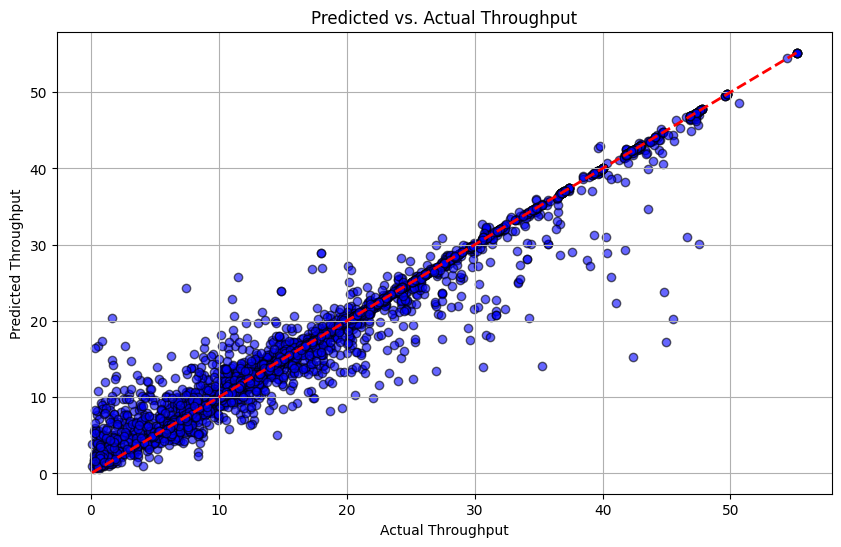

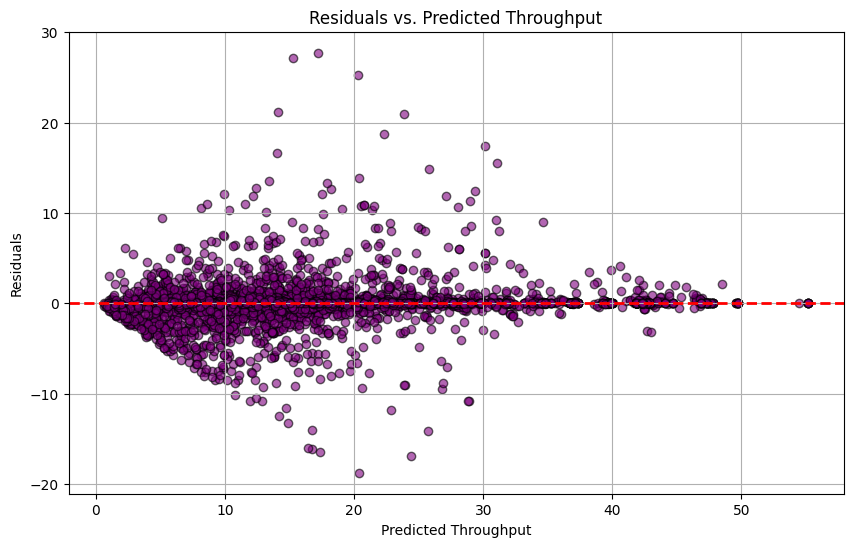

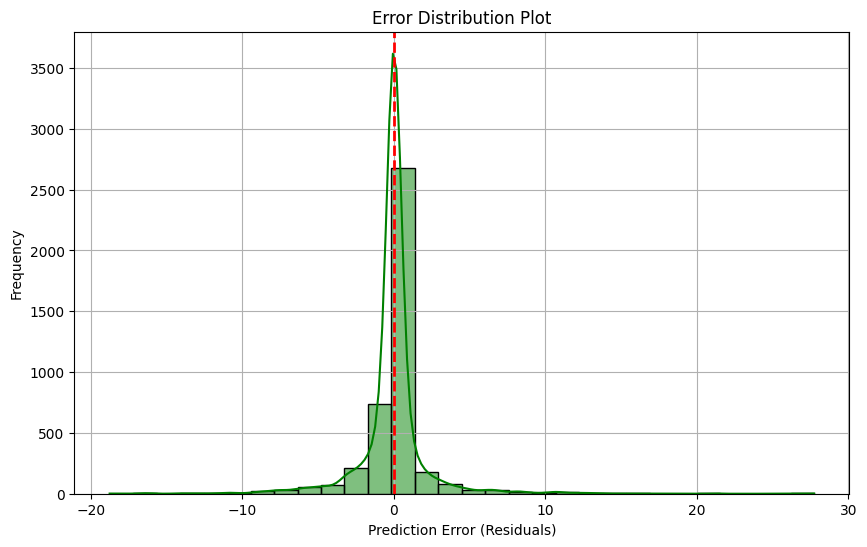

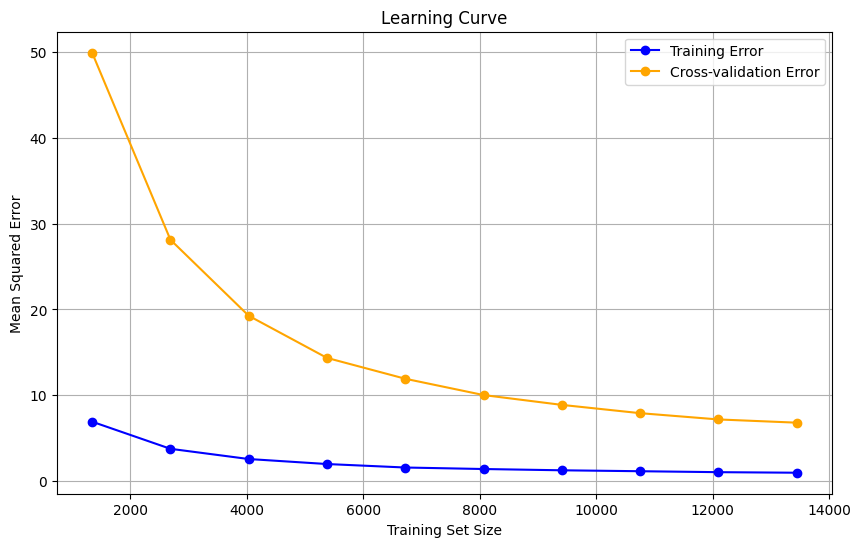

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.xlabel('Actual Throughput')
plt.ylabel('Predicted Throughput')
plt.title('Predicted vs. Actual Throughput')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Throughput')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Throughput')
plt.grid(True)
plt.show()

# Error Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Prediction Error (Residuals)')
plt.ylabel('Frequency')
plt.title('Error Distribution Plot')
plt.grid(True)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label="Training Error")
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label="Cross-validation Error")
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Gradient boosting

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning - Gradient Boosting with Cross-Validation
gb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# Evaluation - Best Gradient Boosting
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)

print(f'Best Gradient Boosting - Mean Squared Error (MSE): {mse_best_gb}')
print(f'Best Gradient Boosting - R^2 Score: {r2_best_gb}')
print(f'Best Gradient Boosting - Mean Absolute Error (MAE): {mae_best_gb}')

# Best Gradient Boosting Accuracy Calculation
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

accuracy_best_gb = calculate_accuracy_percentage(mae_best_gb, mean_throughput)
print(f'Best Gradient Boosting Model Accuracy: {accuracy_best_gb:.2f}%')

# Predicting Throughput on Evaluation Dataset using Best Gradient Boosting
X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)
eval_predictions_gb = best_gb_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset (Gradient Boosting): {eval_predictions_gb}')

Best Gradient Boosting - Mean Squared Error (MSE): 8.280135811093437
Best Gradient Boosting - R^2 Score: 0.9334627714876412
Best Gradient Boosting - Mean Absolute Error (MAE): 1.8777484204358175
Best Gradient Boosting Model Accuracy: 89.05%
Predicted Throughput on Evaluation Dataset (Gradient Boosting): [22.94133129 16.64292826 22.61868378 17.34348536 32.32101799 23.0025521
 12.38014826 16.64930103 15.84081764 18.71155612 19.19801301 17.73404104
 15.73962902 21.85667921 15.99261029 26.04705576 22.20192221 18.02833231
 19.5978413  21.05814922 19.82733233 17.71720996 17.92450019 16.28792557
 21.43894295 17.10276886 17.49444894 20.61698732 18.31256468 16.0641277
 21.77419315 18.00127562 13.02160269 29.64837704 18.57423824 16.76206223
 24.87670413 17.41543241 21.50047792 15.86510387 29.35264434 32.25721975
 20.16611959 21.74648216 18.74596142 17.62846261 19.07952074 25.27303323
 14.40913169 12.30190538 28.40644948 11.64551623 30.82658412 20.64797783
 24.34516757 20.79689286 28.13283349 26.

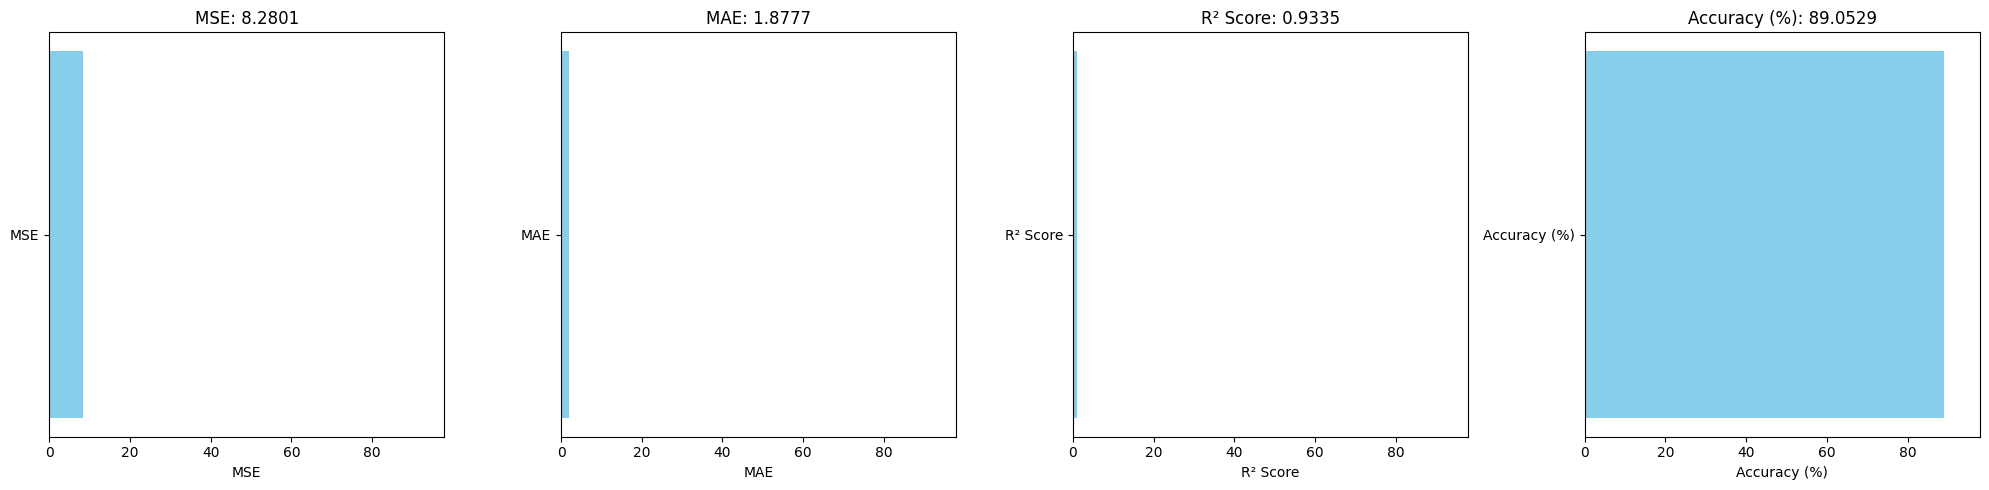

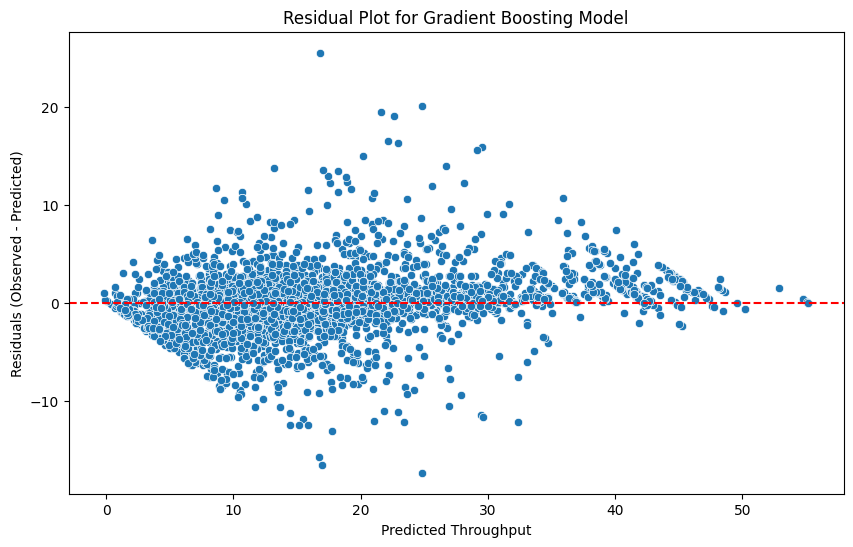

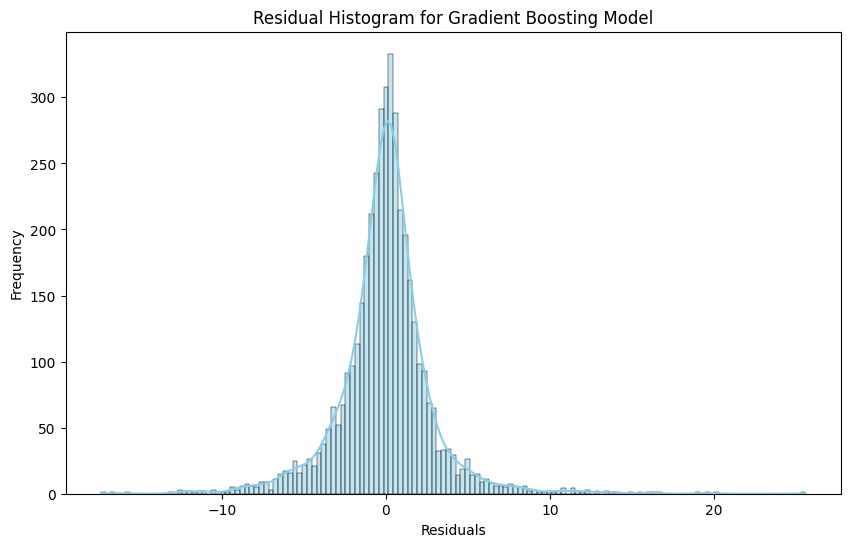

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Performance Metrics
metrics = {
    'MSE': mse_best_gb,
    'MAE': mae_best_gb,
    'R² Score': r2_best_gb,
    'Accuracy (%)': accuracy_best_gb
}

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, (metric_name, value) in enumerate(metrics.items()):
    axs[i].barh([metric_name], [value], color='skyblue')
    axs[i].set_xlim(0, max(metrics.values()) * 1.1)
    axs[i].set_title(f'{metric_name}: {value:.4f}')
    axs[i].set_xlabel(metric_name)

plt.tight_layout()
plt.show()

# Residual Plot for Gradient Boosting Model
residuals = y_test - y_pred_best_gb

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best_gb, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Throughput')
plt.ylabel('Residuals (Observed - Predicted)')
plt.title('Residual Plot for Gradient Boosting Model')
plt.show()

# Histogram of Residuals to Check Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residual Histogram for Gradient Boosting Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


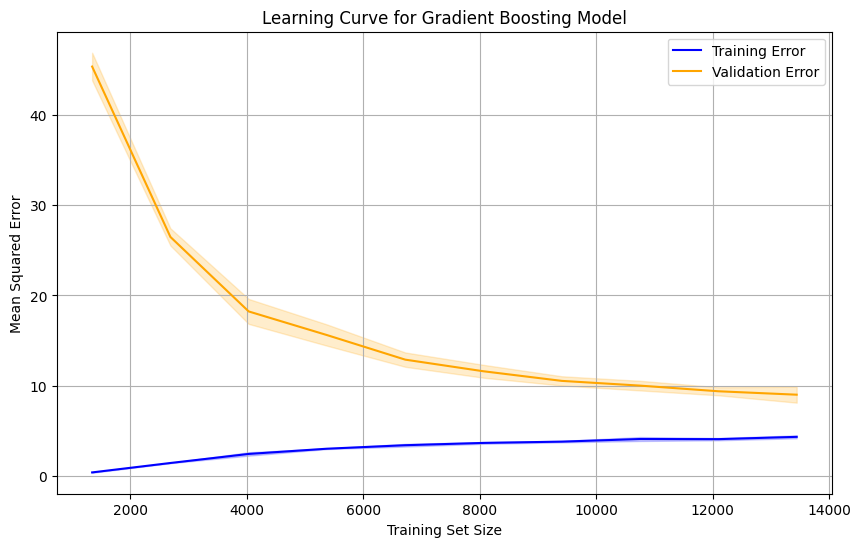

In [5]:
from sklearn.model_selection import learning_curve

# Define the training set sizes (as percentages) to be used for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_gb_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate the mean and standard deviation of training and validation scores
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Plotting the Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error', color='blue')
plt.plot(train_sizes, val_errors, label='Validation Error', color='orange')
plt.fill_between(train_sizes, train_errors - train_scores.std(axis=1), train_errors + train_scores.std(axis=1), color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_errors - val_scores.std(axis=1), val_errors + val_scores.std(axis=1), color='orange', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Gradient Boosting Model')
plt.legend()
plt.grid()
plt.show()


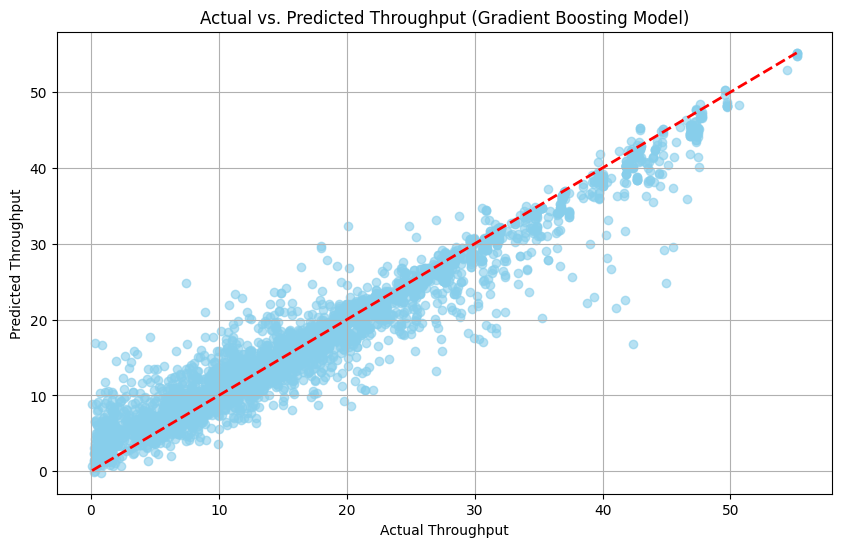

In [14]:
# Scatter Plot for Actual vs. Predicted Throughput
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_gb, color='skyblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Line of equality
plt.xlabel('Actual Throughput')
plt.ylabel('Predicted Throughput')
plt.title('Actual vs. Predicted Throughput (Gradient Boosting Model)')
plt.grid()
plt.show()


# tuned Neural network

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Tuned Neural Network Model
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

# Evaluation - Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f'Neural Network (Tuned) - Mean Squared Error (MSE): {mse_nn}')
print(f'Neural Network (Tuned) - R^2 Score: {r2_nn}')
print(f'Neural Network (Tuned) - Mean Absolute Error (MAE): {mae_nn}')

# Tuned Neural Network Accuracy Calculation
accuracy_nn_tuned = calculate_accuracy_percentage(mae_nn, mean_throughput)
print(f'Tuned Neural Network Model Accuracy: {accuracy_nn_tuned:.2f}%')

# Predicting Throughput on Evaluation Dataset using Tuned Neural Network
eval_predictions_nn = nn_model.predict(X_eval).flatten()
print(f'Predicted Throughput on Evaluation Dataset (Neural Network): {eval_predictions_nn}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network (Tuned) - Mean Squared Error (MSE): 20.734999817851804
Neural Network (Tuned) - R^2 Score: 0.8333784067604645
Neural Network (Tuned) - Mean Absolute Error (MAE): 3.1573980097267365
Tuned Neural Network Model Accuracy: 81.59%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predicted Throughput on Evaluation Dataset (Neural Network): [ 1.14260384e+02  1.16423187e+02  1.49516129e+02  1.04903191e+02
  1.06167633e+02  1.21525772e+02  1.71987564e+02  1.06180481e+02
  4.18565483e+01  1.34653198e+02  1.01273895e+02  1.09484001e+02
  1.03788765e+02  1.23222649e+02  1.08837700e+02  1.34284805e+02
  1.10043793e+02  1.24266281e+02  1.59818710e+02  1.43396378e+02
  1.09896339e+02  1.41976303e+02  1.99944626e+02  1.18569611e+02
  1.78525162e+02  1.03291458e+02  1.01622299e+02  9.51646194e+01
  1.04455208e+02  1.05451523e+02  1.43365707e+02  1.55578201e+02
  1.14397926e+02  1.01671692e+02  1.01897789e+02  2.08967575e+02
  1.93982468e+02  1.69221191e+02 

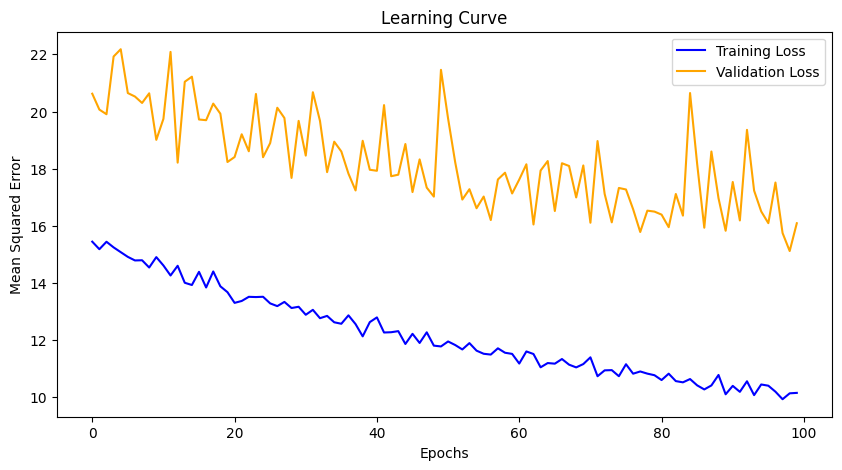

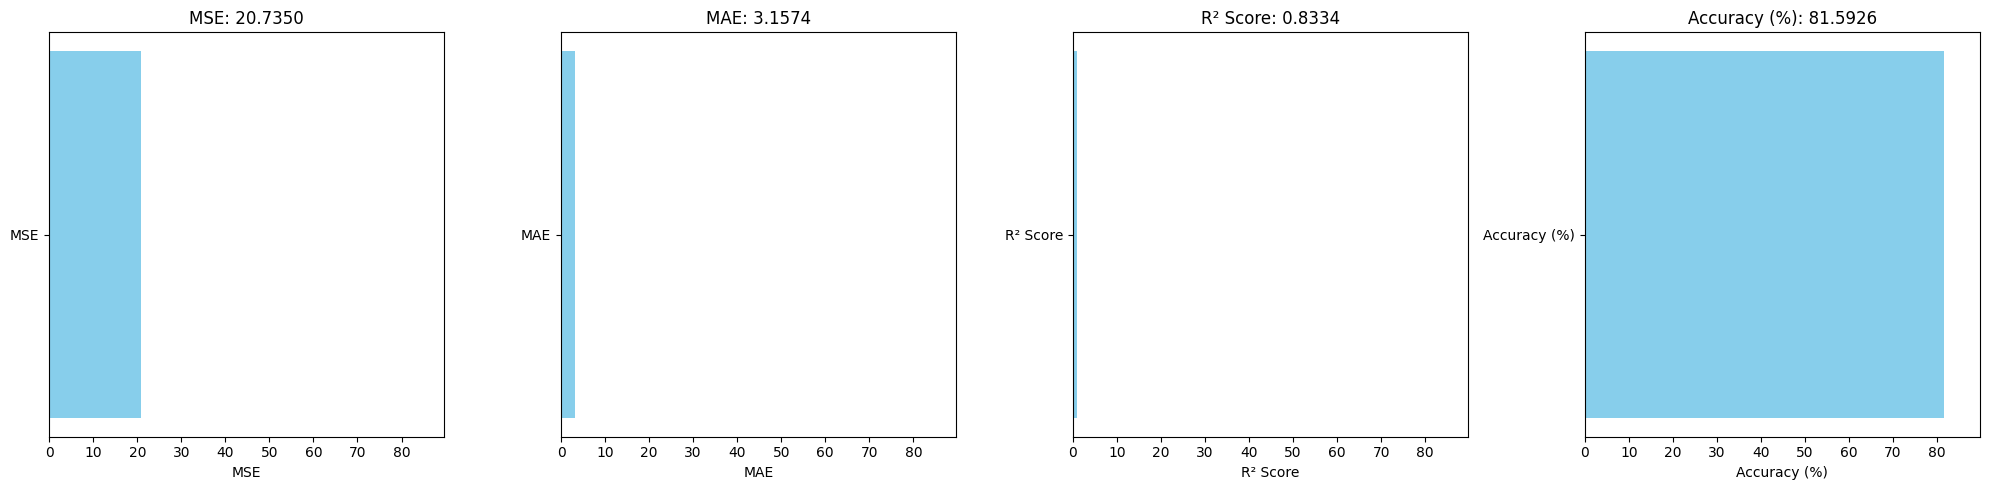

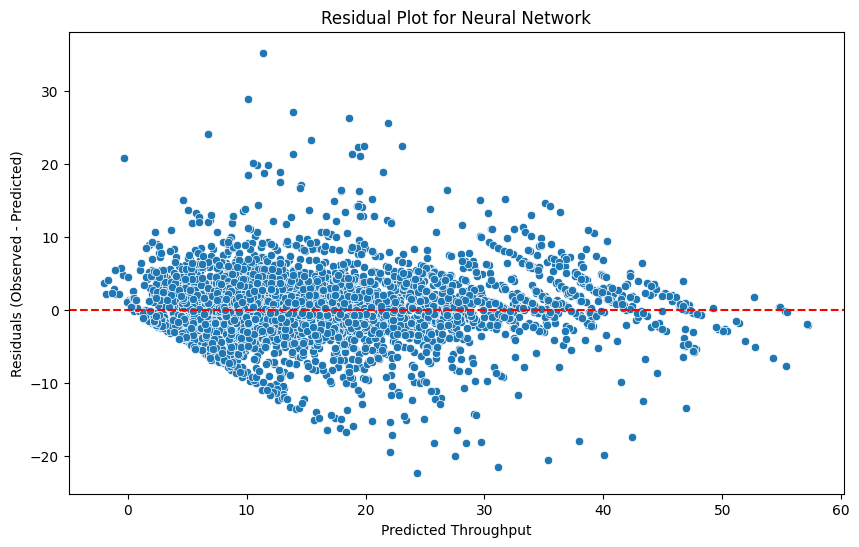

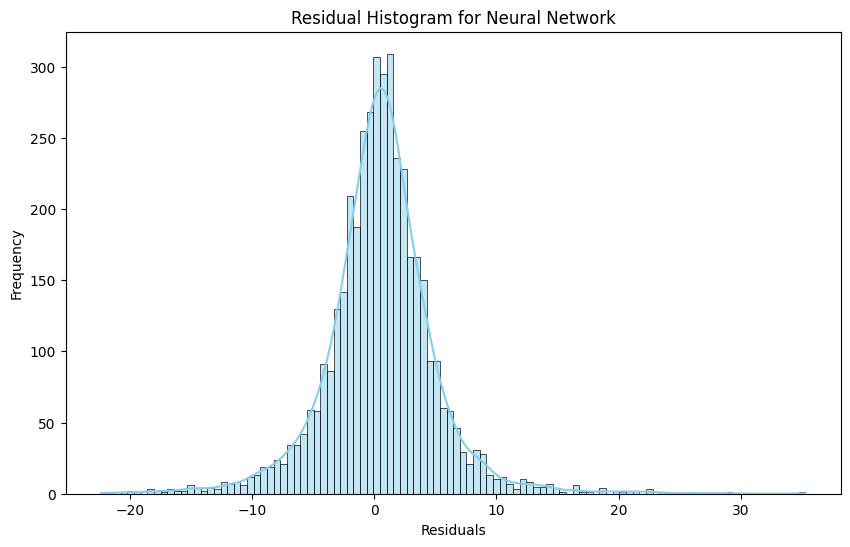

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plotting Learning Curves
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# 2. Regression Metrics Bar Plot
metrics = {
    'MSE': mse_nn,
    'MAE': mae_nn,
    'R² Score': r2_nn,
    'Accuracy (%)': accuracy_nn_tuned
}

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, (metric_name, value) in enumerate(metrics.items()):
    axs[i].barh([metric_name], [value], color='skyblue')
    axs[i].set_xlim(0, max(metrics.values()) * 1.1)
    axs[i].set_title(f'{metric_name}: {value:.4f}')
    axs[i].set_xlabel(metric_name)

plt.tight_layout()
plt.show()

# 3. Residual Analysis
# Residual Plot
residuals_nn = y_test - y_pred_nn

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_nn, y=residuals_nn)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Throughput')
plt.ylabel('Residuals (Observed - Predicted)')
plt.title('Residual Plot for Neural Network')
plt.show()

# Residuals Histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals_nn, kde=True, color='skyblue')
plt.title('Residual Histogram for Neural Network')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


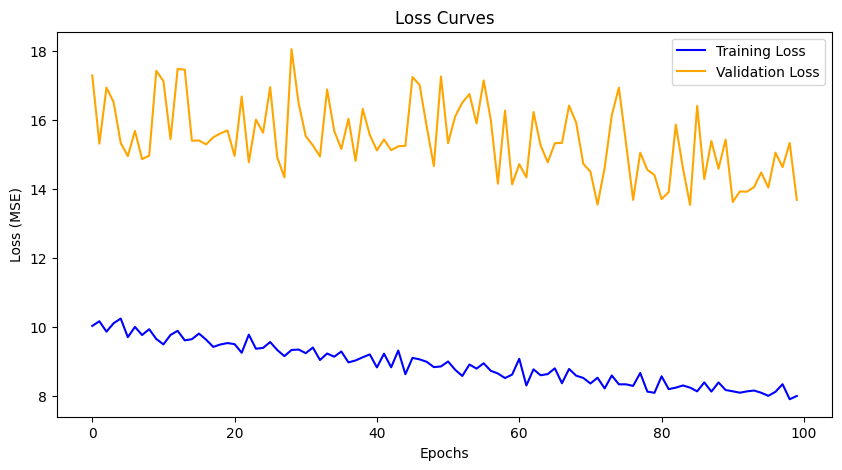

In [8]:
# Train the model and capture the training history
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


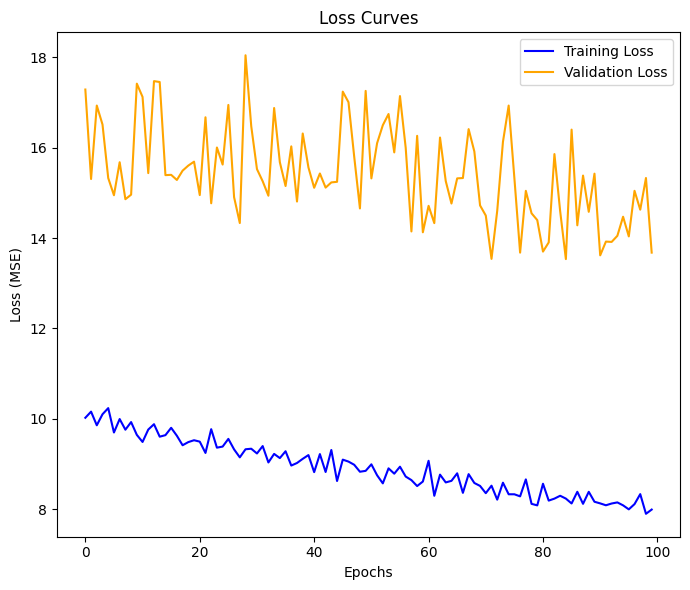

In [10]:
# If you don't want to retrain and just plot loss
plt.figure(figsize=(7, 6))

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network (Tuned) - Mean Squared Error (MSE): 19.209636518825288
Neural Network (Tuned) - R^2 Score: 0.8456358683175219
Neural Network (Tuned) - Mean Absolute Error (MAE): 2.96659960563864
Tuned Neural Network Model Accuracy: 82.70%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predicted Throughput on Evaluation Dataset (Neural Network): [ 2.88010788e+01  3.53220520e+01  2.18180809e+01  4.40720139e+01
  2.12382507e+01  3.56894608e+01  1.10490692e+02  8.15984802e+01
  1.01624519e+02  7.23551941e+01  4.81462479e+01  3.41011887e+01
  3.76532822e+01  2.96262665e+01  4.24648361e+01  5.40068588e+01
  3.22644958e+01  5.56861191e+01  1.71012840e+01  6.24301491e+01
  3.71677856e+01  4.51968231e+01  1.37126846e+02  4.67415390e+01
  3.62510529e+01  3.01597977e+01  2.71657944e+01  4.99227943e+01
  2.79698639e+01  2.02430649e+01  5.30305595e+01  3.62160492e+01
  5.15707703e+01  2.23536682e+01  3.80695877e+01  1.27605888e+02
  9.59295883e+01  5.22176208e+01  1

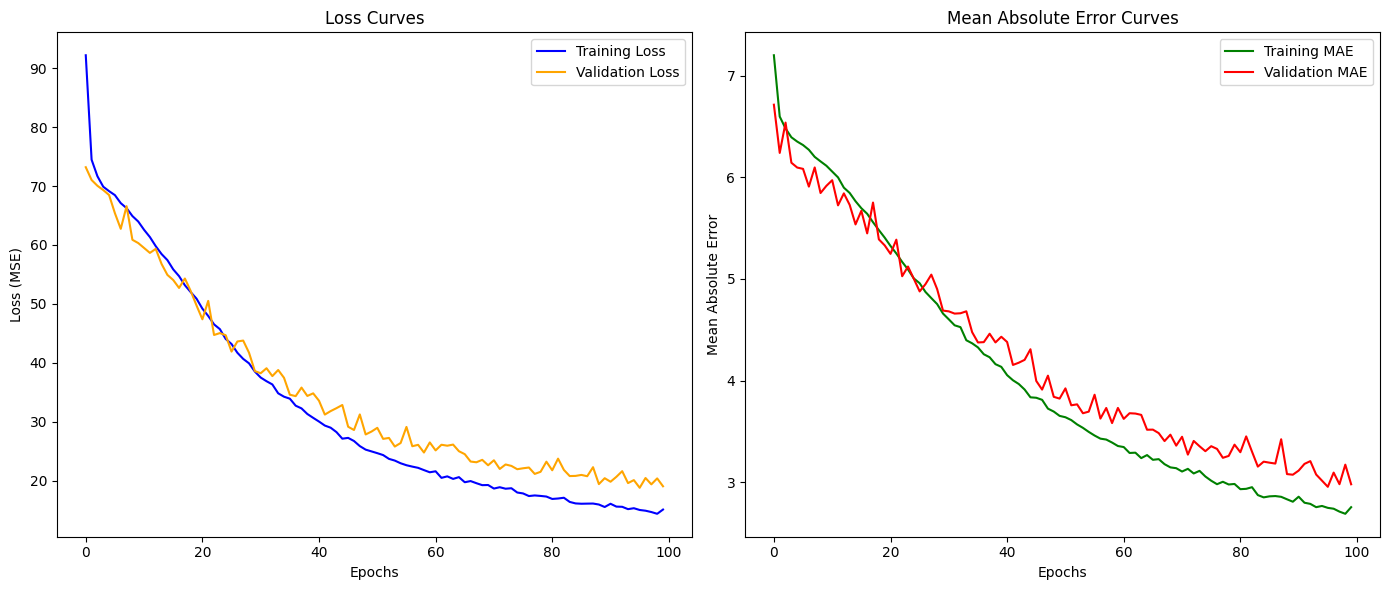

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Tuned Neural Network Model
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model with Mean Absolute Error as a metric
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model and capture the training history
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

# Evaluation - Neural Network
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f'Neural Network (Tuned) - Mean Squared Error (MSE): {mse_nn}')
print(f'Neural Network (Tuned) - R^2 Score: {r2_nn}')
print(f'Neural Network (Tuned) - Mean Absolute Error (MAE): {mae_nn}')

# Tuned Neural Network Accuracy Calculation
accuracy_nn_tuned = calculate_accuracy_percentage(mae_nn, mean_throughput)
print(f'Tuned Neural Network Model Accuracy: {accuracy_nn_tuned:.2f}%')

# Predicting Throughput on Evaluation Dataset using Tuned Neural Network
eval_predictions_nn = nn_model.predict(X_eval).flatten()
print(f'Predicted Throughput on Evaluation Dataset (Neural Network): {eval_predictions_nn}')

# Plotting Loss and MAE Curves
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='green')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.title('Mean Absolute Error Curves')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()


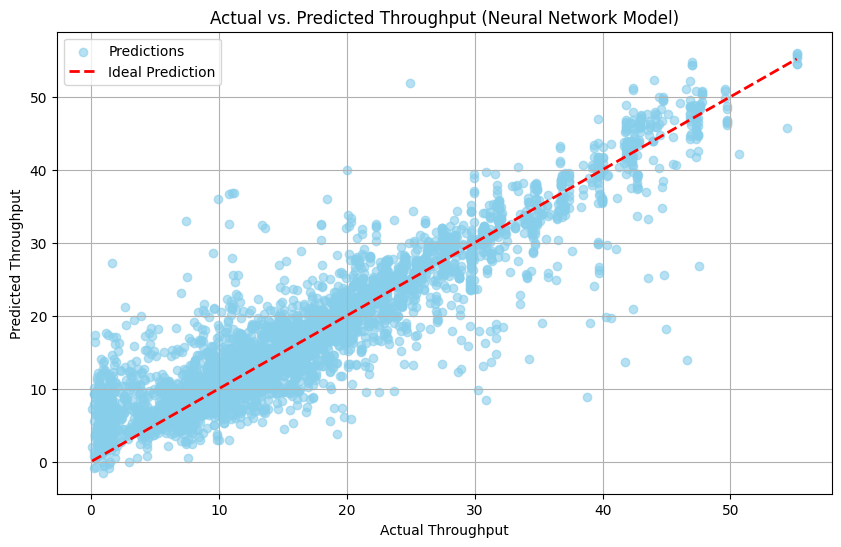

In [16]:
# Plotting Actual vs. Predicted Throughput
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='skyblue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')
plt.xlabel('Actual Throughput')
plt.ylabel('Predicted Throughput')
plt.title('Actual vs. Predicted Throughput (Neural Network Model)')
plt.legend()
plt.grid()
plt.show()


# Linear Regression

Linear Regression - Mean Squared Error (MSE): 76.7272032654898
Linear Regression - R^2 Score: 0.38343819796405965
Linear Regression - Mean Absolute Error (MAE): 6.73831925218616
Linear Regression Model Accuracy: 60.72%


<ipython-input-17-73c715730a94>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


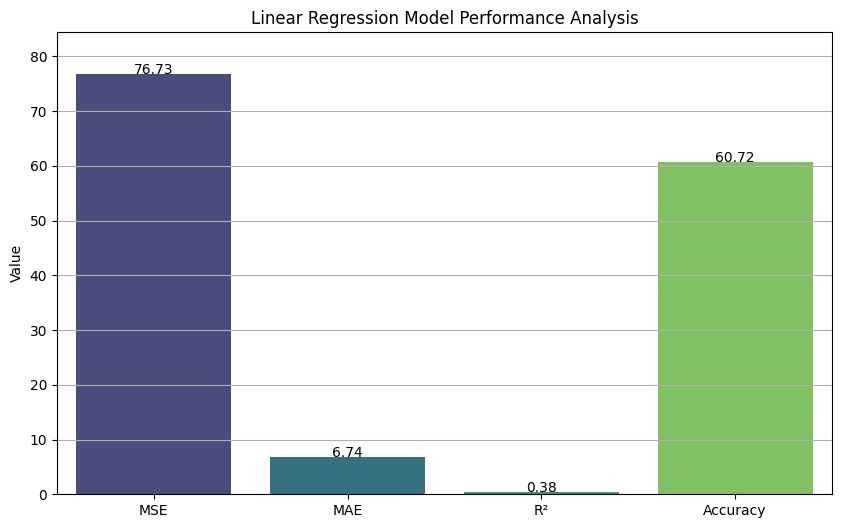

Predicted Throughput on Evaluation Dataset: [ -80.39453107  -92.2275768   -76.16498845  -90.21552585  -85.80592747
  -77.77210526  -83.2268641   -92.91290346  -86.7516207   -88.35209381
  -93.1946335   -86.87051602  -91.71355202  -80.70886601  -83.27969319
  -82.58900476  -75.9309371   -94.69071093  -74.57179873  -82.28253307
  -83.42148593  -77.54333486  -78.62333934  -80.49952514  -76.68338675
  -83.11456068  -84.0332583  -100.00370958  -80.49032618 -105.45312193
  -78.51769214  -77.74640406 -100.25452336  -84.28203088  -84.62310408
  -74.04092479  -75.91117728  -76.92835157  -77.57205041  -84.78923919
  -72.4499817   -77.69283205  -88.77202239  -75.94301883  -85.94973498
  -77.63333885  -81.76938421  -76.01725805  -85.22653218  -82.58334486
  -74.04989353  -81.54817027  -71.55450907  -76.8997021   -81.45967069
  -74.58163561  -74.57035413  -74.81413022  -74.56698099  -77.46137234
  -97.40644469  -74.64952556  -83.00437481  -79.12897525  -80.30827993
  -79.4199223   -77.83158408  -75

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the Training Dataset
url = 'https://drive.google.com/file/d/1WdGxw3Oqm-pycQWpr1BjHN6oJ6pwd2Rb/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
train_data_set = pd.read_csv(dwn_url, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

# Feature Selection
X = train_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
y = train_data_set['throughput']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Evaluation - Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Linear Regression - Mean Squared Error (MSE): {mse_lr}')
print(f'Linear Regression - R^2 Score: {r2_lr}')
print(f'Linear Regression - Mean Absolute Error (MAE): {mae_lr}')

# Calculate Accuracy Percentage
mean_throughput = y.mean()

def calculate_accuracy_percentage(mae, mean_throughput):
    relative_mae_percentage = (mae / mean_throughput) * 100
    return 100 - relative_mae_percentage

# Linear Regression Accuracy
accuracy_lr = calculate_accuracy_percentage(mae_lr, mean_throughput)
print(f'Linear Regression Model Accuracy: {accuracy_lr:.2f}%')

# Plotting Performance Analysis
metrics = ['MSE', 'MAE', 'R²', 'Accuracy']
values = [mse_lr, mae_lr, r2_lr, accuracy_lr]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Linear Regression Model Performance Analysis')
plt.ylabel('Value')
plt.ylim(0, max(values) * 1.1)
for index, value in enumerate(values):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')
plt.grid(axis='y')
plt.show()

# Predicting Throughput on Evaluation Dataset
url_eval = 'https://drive.google.com/file/d/1BazG82OTa8wd10bIqVbduzaIf_FiOO0q/view?usp=sharing'
file_id_eval = url_eval.split('/')[-2]
dwn_url_eval = 'https://drive.google.com/uc?id=' + file_id_eval
eval_data_set = pd.read_csv(dwn_url_eval, names=['context', 'obss_pd', 'throughput', 'interference', 'rssi', 'sinr'], sep=";", skiprows=1)

X_eval = eval_data_set[['context', 'obss_pd', 'interference', 'rssi', 'sinr']]
X_eval_poly = poly.transform(X_eval)
X_eval = scaler.transform(X_eval_poly)

eval_predictions = lr_model.predict(X_eval)
print(f'Predicted Throughput on Evaluation Dataset: {eval_predictions}')
